In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl


In [38]:
df= pd.read_csv("dataset/Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [40]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


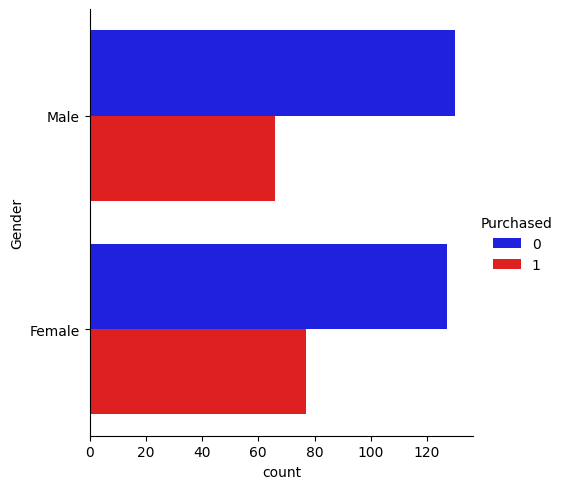

In [41]:
import seaborn as sb

pallete={
    1:"red",
    0:"blue",
}
sb.catplot(data=df, y="Gender",hue="Purchased",kind="count",palette=pallete)

In [46]:
from sklearn.preprocessing import OrdinalEncoder
item_gender=[["Male","Female"]]
ordinal_feature=['Gender'] 
ordinal_encoder=OrdinalEncoder(categories=item_gender)



In [47]:
from sklearn.compose import ColumnTransformer

Gender=ColumnTransformer( transformers=[('ord',ordinal_encoder, ordinal_feature)])
Gender.set_output(transform='pandas')
encoded_feature = Gender.fit_transform(df)


In [66]:
encoded_df = encoded_feature.assign(EstimatedSalary=df["EstimatedSalary"]).assign(Age=df["Age"]).assign(Purchased=df["Purchased"])


In [69]:
from sklearn.model_selection import train_test_split
x=encoded_df[encoded_df.columns.difference(['Purchased'])]
y=encoded_df["Purchased"]

x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)



In [78]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(classification_report(y_test,pred))
print(pred)
print(model.score(x_train,y_train))



              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1]
0.828125


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


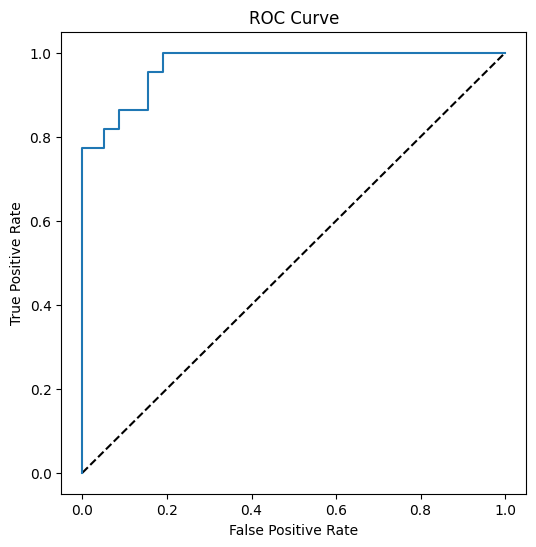

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()